In [1]:
import pandas as pd
import numpy as np

# 以CSV文件为例
data = pd.read_csv('LSTMdata/data.csv')

# 查看数据的基本信息，包括数据类型、缺失值等
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hour             744 non-null    object 
 1   Occupancy (%)    744 non-null    float64
 2   Speed (mph)      744 non-null    float64
 3   VMT (Veh-Miles)  744 non-null    float64
 4   VHT (Veh-Hours)  744 non-null    float64
 5   TTI              744 non-null    float64
 6   South            744 non-null    float64
 7   East             744 non-null    float64
 8   North            744 non-null    float64
 9   Flow (Veh/Hour)  744 non-null    float64
dtypes: float64(9), object(1)
memory usage: 58.2+ KB


In [2]:
# 将除第一列外的所有列转换为数值类型
data.iloc[:, 1:] = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

data

,Hour,Occupancy (%),Speed (mph),VMT (Veh-Miles),VHT (Veh-Hours),TTI,South,East,North,Flow (Veh/Hour)
0,1/1/2023 0:00,3.2,56.6,1599.1,28.2,1.1,1718.0,2289.0,1560.0,1929.0
1,1/1/2023 1:00,5.0,53.8,2583.2,48.0,1.1,2040.0,2989.0,2203.0,3116.0
2,1/1/2023 2:00,3.0,65.8,1864.4,28.3,0.9,1521.0,2580.0,1333.0,2249.0
3,1/1/2023 3:00,3.3,67.3,2175.3,32.3,0.9,904.0,2648.0,936.0,2624.0
4,1/1/2023 4:00,1.8,68.3,1131.6,16.6,0.9,774.0,1846.0,743.0,1365.0
...,...,...,...,...,...,...,...,...,...,...
739,1/31/2023 19:00,5.6,69.5,3049.9,43.9,0.9,4034.0,3229.0,4752.0,3679.0
740,1/31/2023 20:00,4.7,67.8,2449.7,36.1,0.9,3273.0,2936.0,3855.0,2955.0
741,1/31/2023 21:00,4.1,66.6,2012.8,30.2,0.9,2713.0,2875.0,3086.0,2428.0
742,1/31/2023 22:00,3.3,62.5,1454.1,23.3,1.0,2123.0,2804.0,2383.0,1754.0


In [3]:
import matplotlib.pyplot as plt

# 将时间戳列转换为datetime类型
data['Hour'] = pd.to_datetime(data['Hour'])

# 将时间戳列设置为索引
data.set_index('Hour', inplace=True)




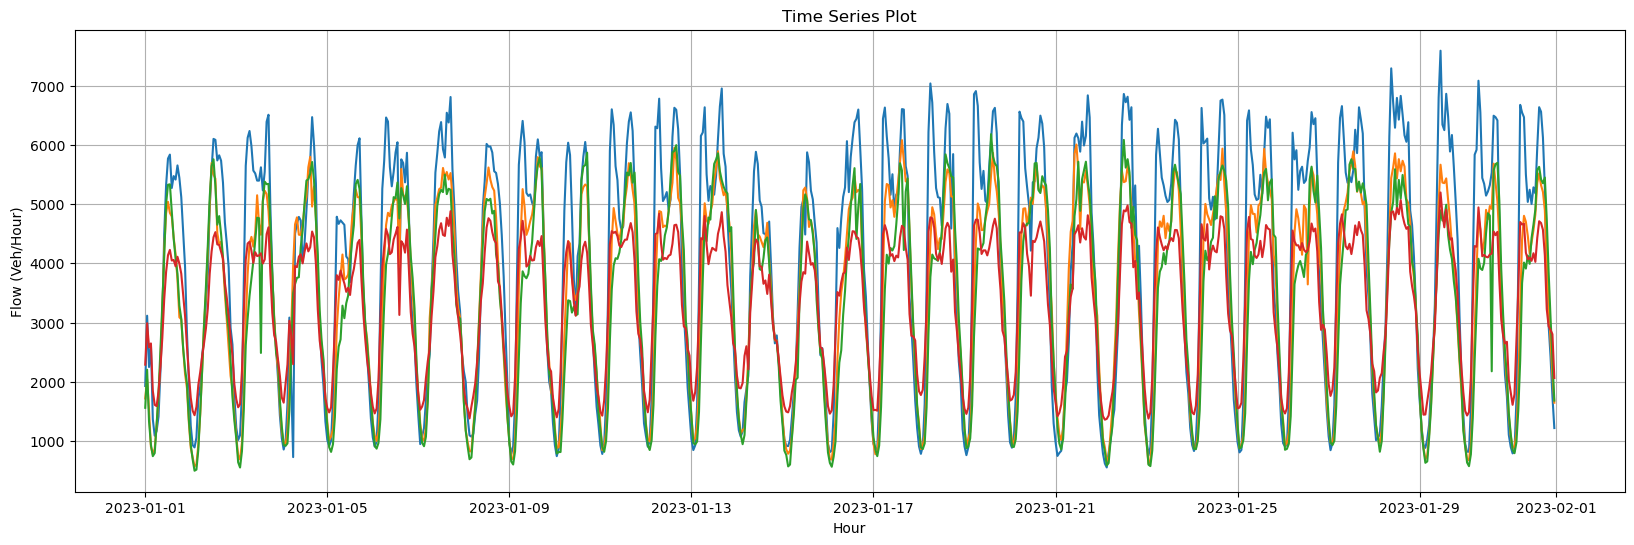

In [4]:
# 绘制折线图
plt.figure(figsize=(20, 6))
plt.plot(data['Flow (Veh/Hour)'],label = 'Flow')
plt.plot(data['South'],label = 'South')
plt.plot(data['North'],label = 'North')
plt.plot(data['East'],label = 'East')
plt.xlabel('Hour')
plt.ylabel('Flow (Veh/Hour)')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [5]:
# 计算相关性系数
correlation_matrix = data.corr()

# 显示相关性系数矩阵
correlation_matrix


,Occupancy (%),Speed (mph),VMT (Veh-Miles),VHT (Veh-Hours),TTI,South,East,North,Flow (Veh/Hour)
Occupancy (%),1.000000,-0.891521,0.733479,0.984579,0.748757,0.697339,0.748178,0.602837,0.733479
Speed (mph),-0.891521,1.000000,-0.503811,-0.881543,-0.826002,-0.514878,-0.526441,-0.424006,-0.503811
VMT (Veh-Miles),0.733479,-0.503811,1.000000,0.784190,0.278809,0.919744,0.987946,0.859492,1.000000
VHT (Veh-Hours),0.984579,-0.881543,0.784190,1.000000,0.706856,0.749423,0.793339,0.660550,0.784190
TTI,0.748757,-0.826002,0.278809,0.706856,1.000000,0.331217,0.313581,0.261021,0.278809
South,0.697339,-0.514878,0.919744,0.749423,0.331217,1.000000,0.931319,0.971894,0.919744
East,0.748178,-0.526441,0.987946,0.793339,0.313581,0.931319,1.000000,0.871445,0.987946
North,0.602837,-0.424006,0.859492,0.660550,0.261021,0.971894,0.871445,1.000000,0.859492
Flow (Veh/Hour),0.733479,-0.503811,1.000000,0.784190,0.278809,0.919744,0.987946,0.859492,1.000000


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = data.drop('Flow (Veh/Hour)', axis=1)
y = data['Flow (Veh/Hour)']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# 应用PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 查看解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

Explained Variance Ratio: [0.74351345 0.19347158 0.03386012 0.0163727  0.00817607 0.00190766
 0.00161006 0.00108837]


In [8]:
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

n_components = np.where(cumulative_variance >= 0.99)[0][0] + 1
print(f'Number of components to explain 90% variance: {n_components}')


Number of components to explain 90% variance: 5


In [9]:
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

In [10]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 定义窗口大小
time_steps = 10


# 标准化目标变量
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# 创建序列化数据
X_seq, y_seq = create_dataset(X_pca_reduced, y_scaled, time_steps)

# 划分训练集和测试集
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 划分训练集和测试集
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 定义LSTM模型结构
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mse')


In [22]:
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=72,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/1000
8/8 [==============================] - 0s 19ms/step - loss: 0.0246 - val_loss: 0.0188
Epoch 2/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0292 - val_loss: 0.0170
Epoch 3/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0263 - val_loss: 0.0201
Epoch 4/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.0266 - val_loss: 0.0187
Epoch 5/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0304 - val_loss: 0.0203
Epoch 6/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0255 - val_loss: 0.0195
Epoch 7/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0258 - val_loss: 0.0194
Epoch 8/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.0278 - val_loss: 0.0221
Epoch 9/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0254 - val_loss: 0.0177
Epoch 10/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0289 - val_loss: 0.0198
Epoch 11/

5/5 [==============================] - 0s 3ms/step


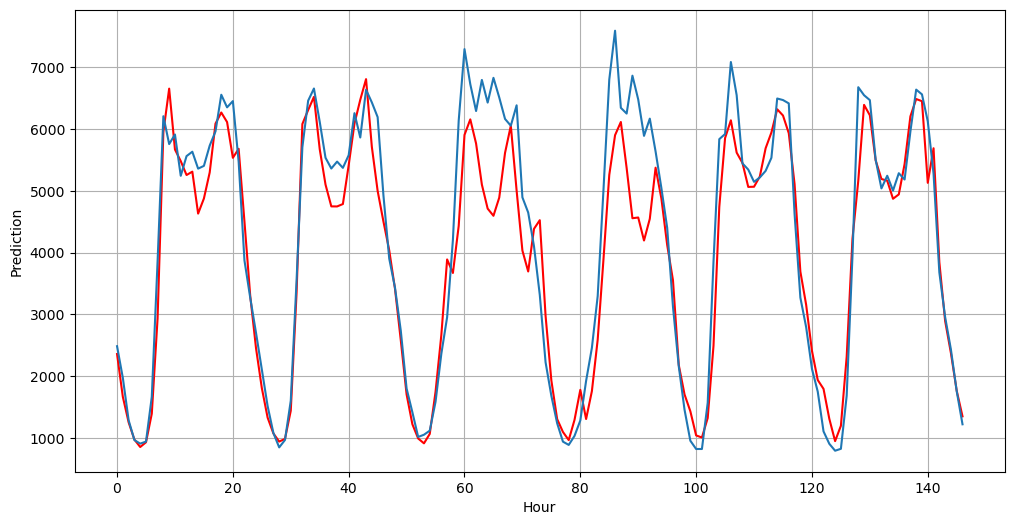

In [23]:

y_pred = model.predict(X_test)

# 逆标准化预测结果
y_pred_inverse = y_scaler.inverse_transform(y_pred)
y_test_inverse = y_scaler.inverse_transform(y_test)

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(y_pred_inverse, label = 'prediction', color = 'red')
plt.plot(y_test_inverse, label = 'realise')

plt.xlabel('Hour')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()


In [24]:
# 计算评估指标，例如MSE、RMSE或MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# 逆标准化MAE
mae_original = mae * y_scaler.scale_


print("MSE:", mse)
print("MAE:", mae_original)

MSE: 0.1223196383239453
MAE: [485.31516458]
